# Data Visualizations for Project 4, Group 6

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
salary_path = "resources/salaries_cleaned.csv"
layoff_path = "resources/layoffs_cleaned.csv"

# Read the mouse data and the study results
salaries_df = pd.read_csv(salary_path)
layoffs_df = pd.read_csv(layoff_path)

In [2]:
# Confirm dataframe loads
salaries_df.head()

,Unnamed: 0,timestamp,date,company,level,title,totalyearlycompensation,location,latitude,longitude,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,0,6/7/2017 11:33,6/7/2017 0:00,Oracle,L3,Product Manager,127000,"Redwood City, CA",37.486324,-122.232523,1.5,1.5,107000,20000,10000,Unknown,Unknown,Unknown
1,1,6/10/2017 17:11,6/10/2017 0:00,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",37.779026,-122.419906,5.0,3.0,0,0,0,Unknown,Unknown,Unknown
2,2,6/11/2017 14:53,6/11/2017 0:00,Amazon,L7,Product Manager,310000,"Seattle, WA",47.603832,-122.330062,8.0,0.0,155000,0,0,Unknown,Unknown,Unknown
3,3,6/17/2017 0:23,6/17/2017 0:00,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",37.368830,-122.036349,7.0,5.0,157000,180000,35000,Unknown,Unknown,Unknown
4,4,6/20/2017 10:58,6/20/2017 0:00,Microsoft,60,Software Engineer,157000,"Mountain View, CA",37.389389,-122.083210,5.0,3.0,0,0,0,Unknown,Unknown,Unknown


In [3]:
# Checking datatypes
salaries_df.dtypes

Unnamed: 0                   int64
timestamp                   object
date                        object
company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
latitude                   float64
longitude                  float64
yearsofexperience          float64
yearsatcompany             float64
basesalary                   int64
stockgrantvalue              int64
bonus                        int64
gender                      object
Race                        object
Education                   object
dtype: object

In [4]:
# Convert totalyearlycompensation to float
salaries_df['totalyearlycompensation'] = salaries_df['totalyearlycompensation'].astype(float)
salaries_df.dtypes

Unnamed: 0                   int64
timestamp                   object
date                        object
company                     object
level                       object
title                       object
totalyearlycompensation    float64
location                    object
latitude                   float64
longitude                  float64
yearsofexperience          float64
yearsatcompany             float64
basesalary                   int64
stockgrantvalue              int64
bonus                        int64
gender                      object
Race                        object
Education                   object
dtype: object

In [5]:
# Confirm dataframe loads
layoffs_df.head()

,Unnamed: 0,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country
0,0,N26,Berlin,Finance,71,4.0,2023-04-28,Series E,United States
1,1,Providoor,Melbourne,Food,0,100.0,2023-04-28,Unknown,Australia
2,2,Dropbox,SF Bay Area,Other,500,16.0,2023-04-27,Post-IPO,United States
3,3,Vroom,New York City,Transportation,120,11.0,2023-04-27,Post-IPO,United States
4,4,Greenhouse,New York City,Recruiting,100,12.0,2023-04-27,Private Equity,United States


## Who are the top salaried companies for 2017 to 2019?

In [6]:
# Finding the mean of the salary ranges within a company 
salary_mean = salaries_df.groupby('company').mean()['totalyearlycompensation']

# Assemble the information into a DataFrame
salary_summary = pd.DataFrame({"Mean Salary": salary_mean})

# Update formatting so it is displayed in salary format (in $)
salary_summary.loc[:, "Mean Salary"] ='$'+ salary_summary["Mean Salary"].map('{:,.0f}'.format)


# Display DataFrame
salary_summary

,Mean Salary
company,
10x Genomics,"$193,333"
23andMe,"$153,429"
2U,"$145,571"
3M,"$118,458"
7-Eleven,"$117,400"
...,...
fuboTV,"$184,333"
iHerb,"$177,600"
iManage,"$136,800"


<Axes: title={'center': 'Top 20 Highest Paying Companies'}, xlabel='Average Annual Compensation (in Millions, $)', ylabel='Company'>

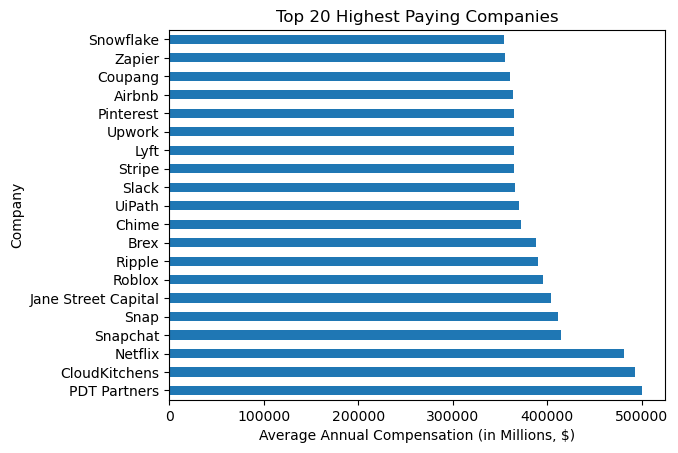

In [7]:
# Graph Top 20 Highest Paying Companies (on Average)
mean = salaries_df.groupby('company').mean()['totalyearlycompensation']
ordered_mean = mean.sort_values(ascending=False)[:20]
top_paying = ordered_mean.plot(kind='barh')
top_paying.set_title("Top 20 Highest Paying Companies")
top_paying.set_xlabel("Average Annual Compensation (in Millions, $)")
top_paying.set_ylabel("Company")
top_paying

<Axes: title={'center': 'Top 20 Highest Paying Companies'}, xlabel='Company', ylabel='Average Annual Compensation (in Millions, $)'>

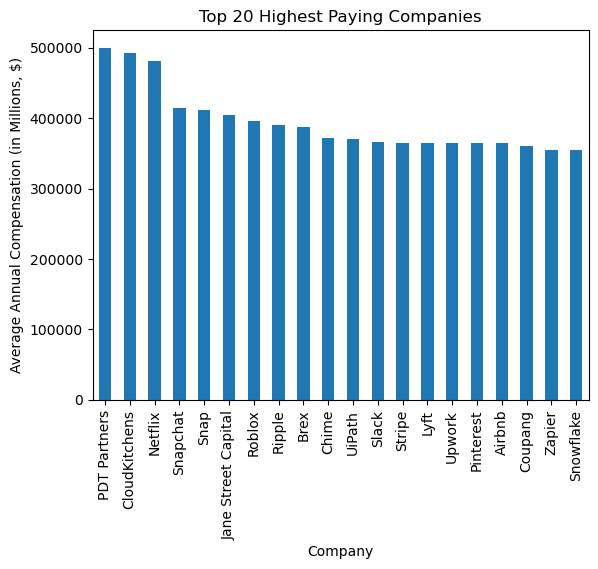

In [8]:
# Graph Top 20 Highest Paying Companies (on Average)
mean = salaries_df.groupby('company').mean()['totalyearlycompensation']
ordered_mean = mean.sort_values(ascending=False)[:20]
top_paying = ordered_mean.plot(kind='bar')
top_paying.set_title("Top 20 Highest Paying Companies")
top_paying.set_xlabel("Company")
top_paying.set_ylabel("Average Annual Compensation (in Millions, $)")
top_paying

In [9]:
# Average salary per company
salary_company = salaries_df.groupby(['company']).totalyearlycompensation.mean()
salary_company

company
10x Genomics    193333.333333
23andMe         153428.571429
2U              145571.428571
3M              118458.333333
7-Eleven        117400.000000
                    ...      
fuboTV          184333.333333
iHerb           177600.000000
iManage         136800.000000
iRobot          152125.000000
 Google          91000.000000
Name: totalyearlycompensation, Length: 1076, dtype: float64

In [10]:
# Average salary by Gender
salary_gender = salaries_df.groupby(['gender']).totalyearlycompensation.mean()
salary_gender

gender
Female     195119.588513
Male       212446.977928
Other      232347.500000
Unknown    230598.485236
Name: totalyearlycompensation, dtype: float64

<Axes: title={'center': 'Top 20 Highest Paying Companies'}, xlabel='Company', ylabel='Average Annual Compensation'>

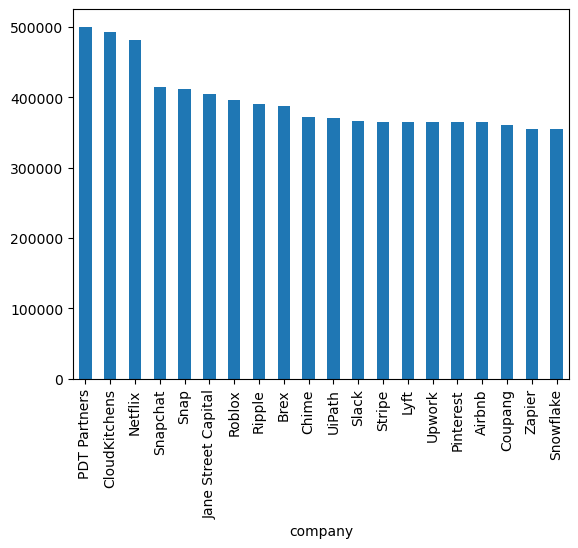

In [11]:
# Graph Top 20 Highest Paying Companies (on Average)
graph_gender = ordered_mean.plot(kind='bar')
top_paying.set_title("Top 20 Highest Paying Companies")
top_paying.set_xlabel("Company")
top_paying.set_ylabel("Average Annual Compensation")
top_paying

In [12]:
salary_race = salaries_df.groupby(['Race']).totalyearlycompensation.mean()
salary_race

Race
Asian          193324.753653
Black          181324.637681
Hispanic       189701.505757
Two Or More    204651.741294
Unknown        226604.277160
White          206293.700199
Name: totalyearlycompensation, dtype: float64

In [13]:
# Average salary per company
avg_salary = (salaries_df.groupby('company')['totalyearlycompensation']
 .agg(['mean'])
 .style.format('${0:,.0f}'))
avg_salary

,mean
company,
10x Genomics,"$193,333"
23andMe,"$153,429"
2U,"$145,571"
3M,"$118,458"
7-Eleven,"$117,400"
8x8,"$296,571"
ABB,"$94,429"
ADP,"$126,723"
AIG,"$135,625"


In [14]:
# Finding the mean and median of the salary ranges within a company 
salary_mean = salaries_df.groupby('company').mean()['totalyearlycompensation']
salary_median = salaries_df.groupby("company").median()['totalyearlycompensation']

# Assemble the information into a DataFrame
salary_summary = pd.DataFrame({"Mean Salary": salary_mean,
                              "Median Salary": salary_median})

# Update formatting so it is displayed in salary format (in $)
salary_summary.loc[:, "Mean Salary"] ='$'+ salary_summary["Mean Salary"].map('{:,.0f}'.format)
salary_summary.loc[:, "Median Salary"] ='$'+ salary_summary["Median Salary"].map('{:,.0f}'.format)

# Display DataFrame
salary_summary

,Mean Salary,Median Salary
company,,
10x Genomics,"$193,333","$175,000"
23andMe,"$153,429","$140,000"
2U,"$145,571","$154,000"
3M,"$118,458","$104,000"
7-Eleven,"$117,400","$120,000"
...,...,...
fuboTV,"$184,333","$184,000"
iHerb,"$177,600","$164,000"
iManage,"$136,800","$154,000"


In [15]:
# Average salary per company
salary_company = salaries_df.groupby(['company']).totalyearlycompensation.mean()
salary_company

company
10x Genomics    193333.333333
23andMe         153428.571429
2U              145571.428571
3M              118458.333333
7-Eleven        117400.000000
                    ...      
fuboTV          184333.333333
iHerb           177600.000000
iManage         136800.000000
iRobot          152125.000000
 Google          91000.000000
Name: totalyearlycompensation, Length: 1076, dtype: float64

In [16]:
# Average salary per company
salary_gender = salaries_df.groupby(['gender']).totalyearlycompensation.mean()
salary_gender

gender
Female     195119.588513
Male       212446.977928
Other      232347.500000
Unknown    230598.485236
Name: totalyearlycompensation, dtype: float64

In [17]:
salary_race = salaries_df.groupby(['Race']).totalyearlycompensation.mean()
salary_race

Race
Asian          193324.753653
Black          181324.637681
Hispanic       189701.505757
Two Or More    204651.741294
Unknown        226604.277160
White          206293.700199
Name: totalyearlycompensation, dtype: float64

In [18]:
salary_education = salaries_df.groupby(['Education']).totalyearlycompensation.mean()
salary_education

Education
Bachelor's Degree    177845.409095
Highschool           187731.250000
Master's Degree      220731.076603
PhD                  291865.531415
Some College         210121.126761
Unknown              225566.187593
Name: totalyearlycompensation, dtype: float64

In [19]:
salary_gender_comp = salaries_df.groupby(['company', 'gender'], as_index=False).totalyearlycompensation.mean()
salary_gender_comp

,company,gender,totalyearlycompensation
0,10x Genomics,Male,173000.000000
1,10x Genomics,Unknown,203500.000000
2,23andMe,Male,129200.000000
3,23andMe,Unknown,214000.000000
4,2U,Male,141833.333333
...,...,...,...
2870,iManage,Male,136800.000000
2871,iRobot,Female,100500.000000
2872,iRobot,Male,152750.000000
2873,iRobot,Unknown,202500.000000


In [20]:
salary_race_comp = salaries_df.groupby(['company', 'Race'], as_index=False).totalyearlycompensation.mean()
salary_race_comp

,company,Race,totalyearlycompensation
0,10x Genomics,Asian,173000.000000
1,10x Genomics,Unknown,203500.000000
2,23andMe,Asian,146000.000000
3,23andMe,Unknown,154666.666667
4,2U,Black,188000.000000
...,...,...,...
3435,iRobot,Asian,160000.000000
3436,iRobot,Two Or More,109000.000000
3437,iRobot,Unknown,217666.666667
3438,iRobot,White,98333.333333


In [21]:
salary_edu_comp = salaries_df.groupby(['company', 'Education'], as_index=False).totalyearlycompensation.mean()
salary_edu_comp

,company,Education,totalyearlycompensation
0,10x Genomics,Master's Degree,161000.000000
1,10x Genomics,PhD,185000.000000
2,10x Genomics,Unknown,203500.000000
3,23andMe,Bachelor's Degree,146000.000000
4,23andMe,Unknown,154666.666667
...,...,...,...
3421,iRobot,Bachelor's Degree,92000.000000
3422,iRobot,Master's Degree,126666.666667
3423,iRobot,PhD,248000.000000
3424,iRobot,Unknown,165666.666667


In [9]:
# Number of salaries per company in dataset
records_per_company = salaries_df.groupby('company')['company'].count()
records_per_company

company
10x Genomics     6
23andMe          7
2U               7
3M              21
3m               3
                ..
zoom             1
zoominfo         1
zoox             3
zynga            1
 Google          1
Name: company, Length: 1631, dtype: int64